# Exploratory Data Analysis of US Suicide Deaths, 2018-2024
Capstone Project for M.S. Data Analytics Program

Melissa Stone Rogers, [GitHub](https://github.com/meldstonerogers/capstone-stonerogers), April 3, 2025

## Introduction 
This is a professional project exaiming trends in suicide over time. This notebook details an exploratory data analysis of deaths by suicide in the US from 2018-2024. Data has been gathered from Center for Disease Control using the Wide-ranging ONline Data for Epidemiologic Research[(WONDER)](https://wonder.cdc.gov) system. 

Commands were used on a Mac machine running zsh.

## Import Dependencies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns 
import seaborn.objects as so

## Data Acquisition

In [2]:
# Load dataset into a pandas DataFrame. 
df = pd.read_csv('data/wonder_suicide_data.csv')

# Display and inspect first rows of the DataFrame
print(df.head())

     state  state_code age_group_years  sex   race  race_code  year  deaths  \
0  Alabama           1           20-24    1  White          4  2018      10   
1  Alabama           1           20-24    1  White          4  2020      12   
2  Alabama           1           25-29    1  White          4  2018      14   
3  Alabama           1           25-29    1  White          4  2020      10   
4  Alabama           1           30-34    1  White          4  2022      11   

   population  
0      101325  
1      102201  
2      108640  
3      105338  
4      110606  


## Initial Data Inspection

In [3]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

     state  state_code age_group_years  sex   race  race_code  year  deaths  \
0  Alabama           1           20-24    1  White          4  2018      10   
1  Alabama           1           20-24    1  White          4  2020      12   
2  Alabama           1           25-29    1  White          4  2018      14   
3  Alabama           1           25-29    1  White          4  2020      10   
4  Alabama           1           30-34    1  White          4  2022      11   
5  Alabama           1           30-34    1  White          4  2023      14   
6  Alabama           1           35-39    1  White          4  2018      20   
7  Alabama           1           35-39    1  White          4  2019      19   
8  Alabama           1           35-39    1  White          4  2020      15   
9  Alabama           1           35-39    1  White          4  2022      10   

   population  
0      101325  
1      102201  
2      108640  
3      105338  
4      110606  
5      111972  
6      102106  
7 

## Initial Data Transformation and Feature Engineering

In [4]:
# Replace age ranges with the starting age as integers
df['age_group_years'] = df['age_group_years'].replace({
    '10-14': 10,
    '15-19': 15,
    '20-24': 20,
    '25-29': 25,
    '30-34': 30,
    '35-39': 35,
    '40-44': 40,
    '45-49': 45,
    '50-54': 50,
    '55-59': 55,
    '60-64': 60,
    '65-69': 65,
    '70-74': 70,
    '75-79': 75,
    '80-84': 80
}).astype(int) 


/var/folders/6n/46l6bw9s2xsd2k8d94qbksg40000gn/T/ipykernel_46981/3731230982.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age_group_years'] = df['age_group_years'].replace({


In [5]:
from pathlib import Path

# Define the path to the file
filepath = Path('data/cleaned_data.csv')

# Make sure the 'data' folder exists
filepath.parent.mkdir(parents=True, exist_ok=True)

# Save the DataFrame to CSV
df.to_csv(filepath, index=False)


## Initial Descriptive Statistics 

In [6]:
print(df.describe())
print(df.dtypes)

        state_code  age_group_years          sex    race_code         year  \
count  7106.000000      7106.000000  7106.000000  7106.000000  7106.000000   
mean     28.521531        43.985364     1.699690     3.756966  2020.952857   
std      15.742229        18.719322     0.458425     0.712340     1.969121   
min       1.000000        10.000000     1.000000     1.000000  2018.000000   
25%      16.000000        30.000000     1.000000     4.000000  2019.000000   
50%      28.000000        45.000000     2.000000     4.000000  2021.000000   
75%      41.000000        60.000000     2.000000     4.000000  2023.000000   
max      56.000000        80.000000     2.000000     5.000000  2024.000000   

            deaths    population  
count  7106.000000  7.106000e+03  
mean     38.017309  1.868834e+05  
std      38.708239  1.804688e+05  
min      10.000000  3.389000e+03  
25%      15.000000  7.532650e+04  
50%      24.000000  1.377875e+05  
75%      47.000000  2.102642e+05  
max     324.00000

## Initial Data Distributions

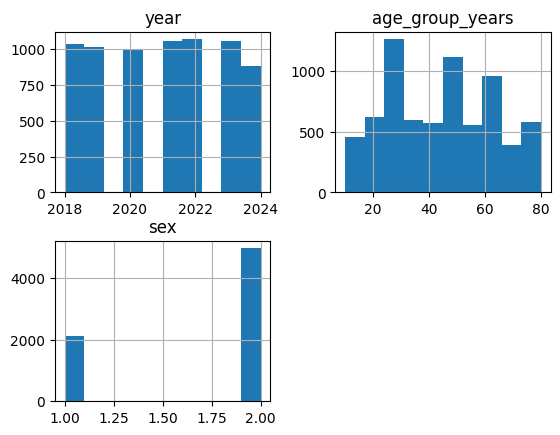

In [7]:
# Inspect histogram for data distribution 
df.hist(column=[
    'year', 
    'age_group_years',
    'sex'])


# Show all plots
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.show()

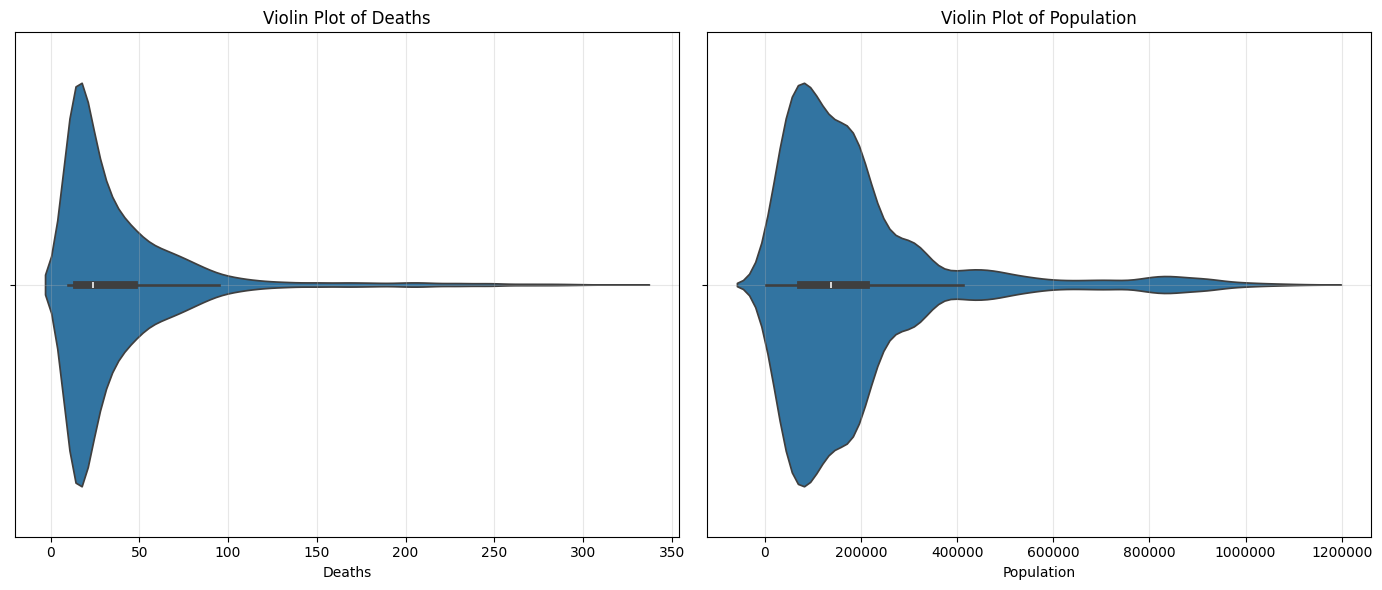

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Violin plot for 'deaths' (horizontal)
sns.violinplot(x=df['deaths'].dropna(), ax=axes[0])
axes[0].set_title('Violin Plot of Deaths')
axes[0].set_xlabel('Deaths')
axes[0].set_ylabel('')
axes[0].grid(True, alpha=0.3)

# Violin plot for 'population' (horizontal)
sns.violinplot(x=df['population'].dropna(), ax=axes[1])
axes[1].set_title('Violin Plot of Population')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('')
axes[1].grid(True, alpha=0.3)
axes[1].ticklabel_format(style='plain', axis='x') 

plt.tight_layout()
plt.show()


## Initial Visualizations & Discussion

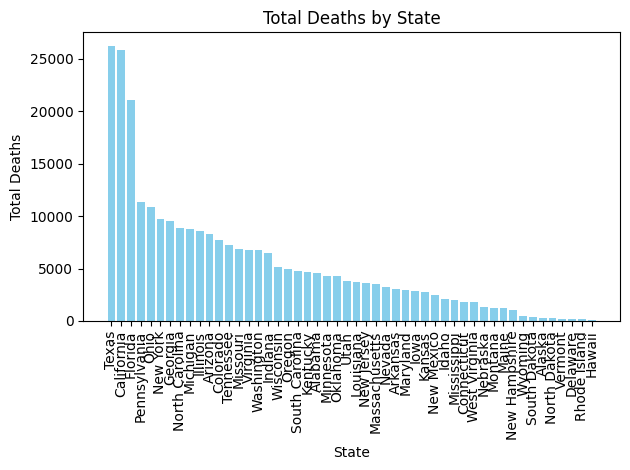

In [9]:
# Aggregate deaths by state (sum the 'deaths' column per state)
state_deaths = df.groupby('state')['deaths'].sum()

# Sort the values from high to low
state_deaths = state_deaths.sort_values(ascending=False)

fig, ax = plt.subplots()

# Create bar plot for aggregated deaths by state
ax.bar(state_deaths.index, state_deaths.values, color='skyblue')

ax.set_title('Total Deaths by State')
ax.set_xlabel('State')
ax.set_ylabel('Total Deaths')

plt.xticks(rotation=90)  # Rotate x-axis labels if there are many states
plt.tight_layout()
plt.show()

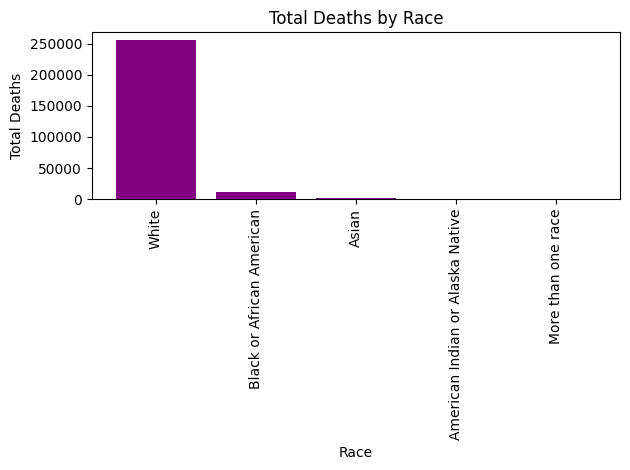

In [10]:
# Aggregate deaths by race (sum the 'deaths' column per race)
race_deaths = df.groupby('race')['deaths'].sum()

# Sort the values from high to low
race_deaths = race_deaths.sort_values(ascending=False)

fig, ax = plt.subplots()

# Create bar plot for aggregated deaths by state
ax.bar(race_deaths.index, race_deaths.values, color='purple')

ax.set_title('Total Deaths by Race')
ax.set_xlabel('Race')
ax.set_ylabel('Total Deaths')

plt.xticks(rotation=90)  # Rotate x-axis labels if there are many states
plt.tight_layout()
plt.show()

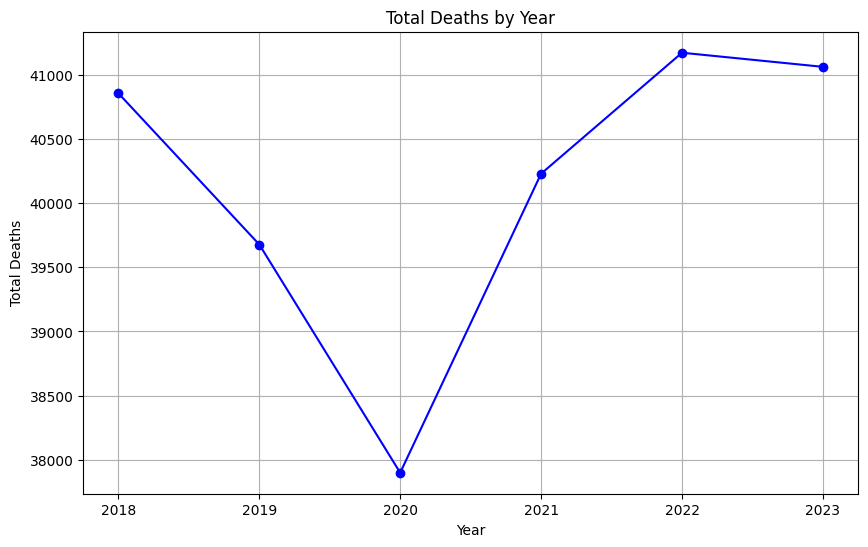

In [11]:
plt.figure(figsize=(10, 6))
df[df['year'] < 2024].groupby('year')['deaths'].sum().plot(kind='line', color='b', marker='o')
plt.title('Total Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

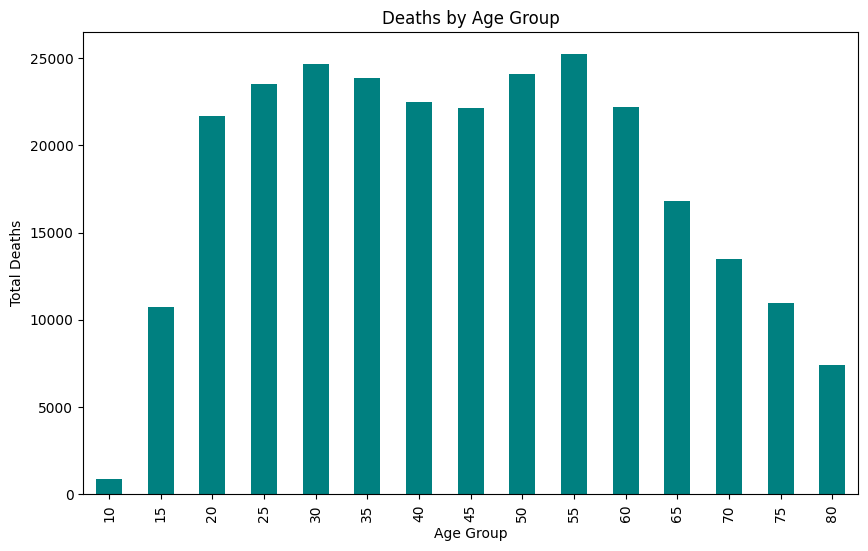

In [12]:
age_group_deaths = df.groupby('age_group_years')['deaths'].sum()
age_group_deaths.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Deaths')
plt.show()


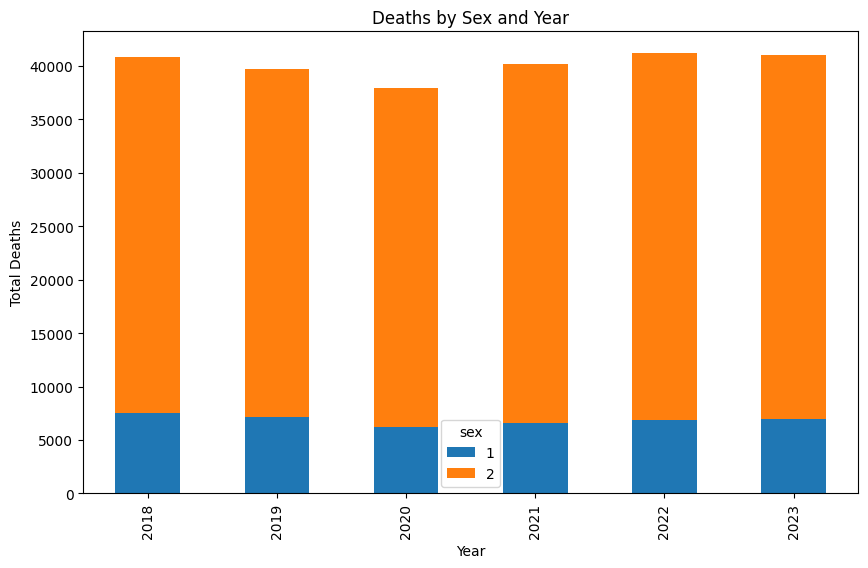

In [13]:
df[df['year'] < 2024] \
    .groupby(['year', 'sex'])['deaths'].sum() \
    .unstack() \
    .plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Deaths by Sex and Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()


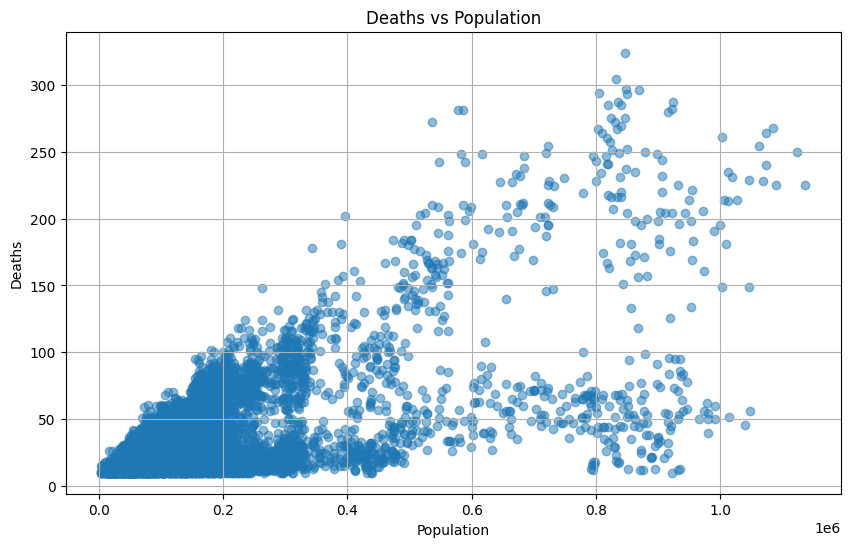

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['deaths'], alpha=0.5)
plt.title('Deaths vs Population')
plt.xlabel('Population')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()


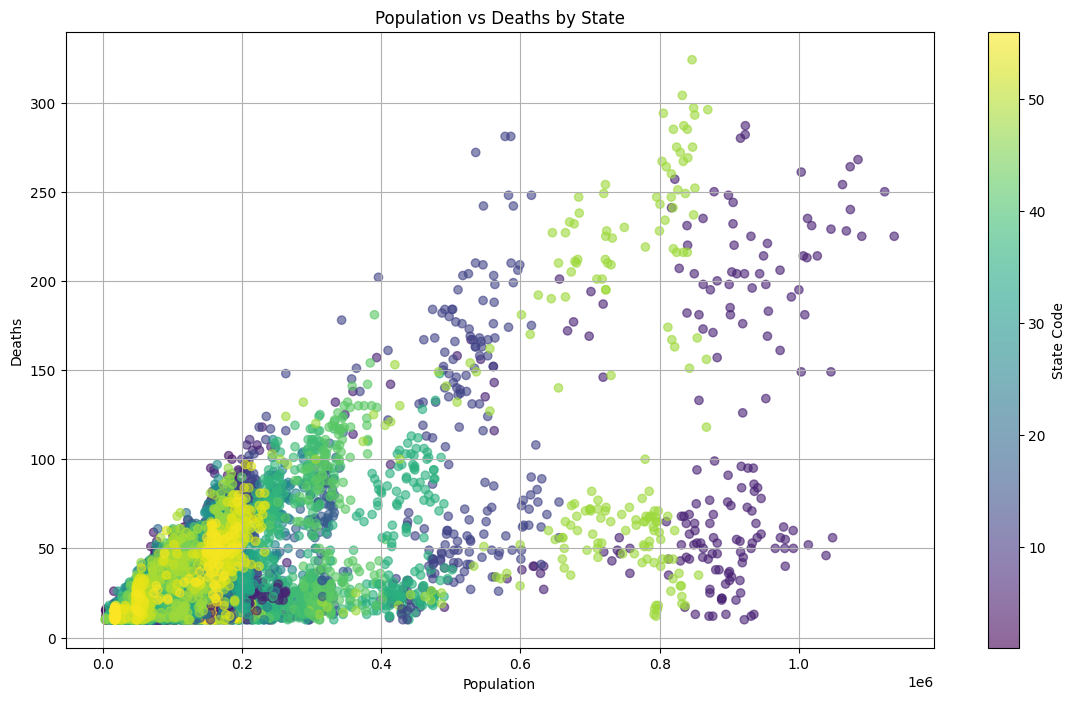

In [15]:
plt.figure(figsize=(14, 8))
plt.scatter(df['population'], df['deaths'], c=df['state_code'], cmap='viridis', alpha=0.6)
plt.title('Population vs Deaths by State')
plt.xlabel('Population')
plt.ylabel('Deaths')
plt.colorbar(label='State Code')
plt.grid(True)
plt.show()



<Figure size 1200x600 with 0 Axes>

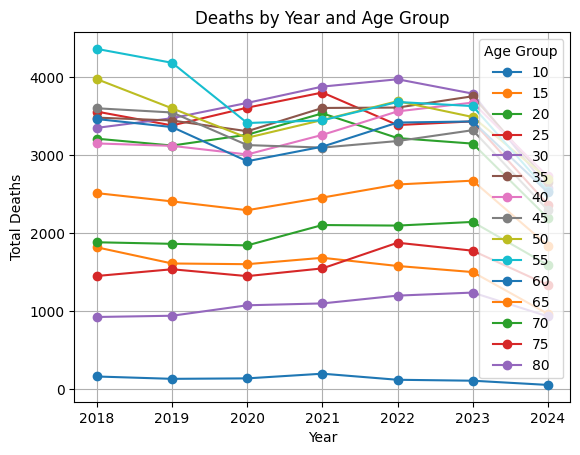

In [16]:
plt.figure(figsize=(12, 6))
df.groupby(['year', 'age_group_years'])['deaths'].sum().unstack().plot(kind='line', marker='o')
plt.title('Deaths by Year and Age Group')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()
